#### Import of data for Titanic CSV file

In [76]:
import pandas as pd
pd.options.mode.chained_assignment = None 
df = pd.read_csv('S:/MIS542/Week 5/MIS542titanic.csv')

In [54]:
df

,Survived,Passanger Class,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [221]:
#Create a new dataframe for manipulation and add a new column for USD
allclass = df[["Passanger Class","Fare in British Pounds", 'Sex', 'Survived', 'Age']]
allclass.insert(2,"Fare in USD", allclass['Fare in British Pounds'] * 1.28,True)

In [32]:
#Filter for just first class passangers
firstclass = allclass[allclass['Passanger Class'] == 1]

In [39]:
# The mean of the Fare in USD
firstclass['Fare in USD'].mean()

107.71800000000006

In [96]:
#Create a new dataframe for manipulation and add a new column for Siblings
passengers = df[["Siblings/Spouses Aboard", "Age"]]
#Create a copy of the original column to store the correct sibling count
passengers.insert(2,"Siblings", passengers['Siblings/Spouses Aboard'],True)

In [102]:
import numpy as np
passengers['Siblings'] = np.where(((passengers.Age >= 20) & (passengers['Siblings/Spouses Aboard'] == 1)),
                                  0,passengers['Siblings'])

In [103]:
passengers[(passengers.Siblings > 0) & (df.Age >= 20)].count()

Siblings/Spouses Aboard    24
Age                        24
Siblings                   24
dtype: int64

In [109]:
#Create a new dataframe for manipulation
notsurvive = df[["Survived", "Age"]]
#Remove survivors
notsurvive[notsurvive['Survived'] == 0].median()

Survived     0.0
Age         28.0
dtype: float64

In [228]:
#Split the ages into bins
bins = [0,20,30,40,50,60,100]
groups = pd.cut(df.Age,bins)

In [229]:
pd.value_counts(groups)

(20, 30]     303
(0, 20]      222
(30, 40]     184
(40, 50]     106
(50, 60]      46
(60, 100]     26
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Titanic Age Groups'}, xlabel='Age Groups', ylabel='Count'>

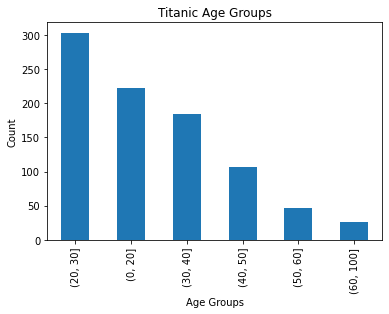

In [232]:
import matplotlib.pyplot as pl
pd.value_counts(groups).plot(kind = 'bar', title = "Titanic Age Group Counts", ylabel = 'Count', xlabel='Age Groups')

In [130]:
# Average ticket price in USD by Sex
allclass.groupby('Sex')['Fare in USD'].mean()

Sex
female    56.934167
male      32.811437
Name: Fare in USD, dtype: float64

In [133]:
# Breakdown by males and female passengers
allclass.groupby('Sex')['Fare in USD'].count()

Sex
female    314
male      573
Name: Fare in USD, dtype: int64

In [193]:
#Survival counts by Passanger Class
survive = df[["Survived", "Age", "Passanger Class", 'Sex']]
survive = survive[survive['Survived'] == 1]

survive.groupby('Passanger Class')['Survived'].count()

Passanger Class
1    136
2     87
3    119
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Titanic Male v Female Counts'}, ylabel='Survived'>

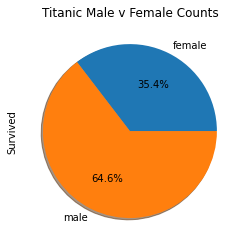

In [204]:

allclass.groupby(['Sex']).count().plot(kind='pie', y='Survived', shadow=True, 
                                       autopct='%1.1f%%', title = "Titanic Male v Female Counts", legend=False)

<AxesSubplot:title={'center':'Titanic Male v Female Survival'}, xlabel='Sex', ylabel='Count'>

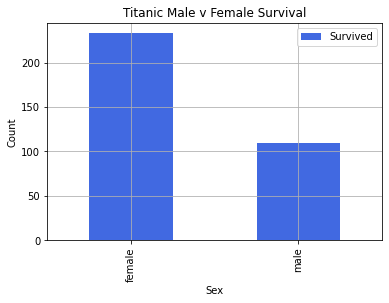

In [201]:
survive.groupby(['Sex']).count().plot(kind='bar', y='Survived', title = "Titanic Survival",
                                     color = 'royalblue', ylabel='Count', grid=True)


<AxesSubplot:title={'center':'Titanic Ages'}, ylabel='Count'>

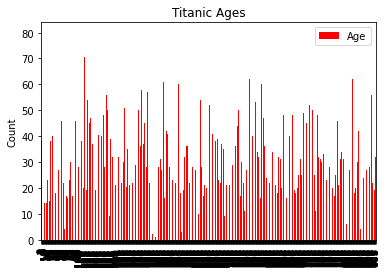

In [212]:
ages = passengers[['Age']]
ages.plot(kind='bar', title = "Titanic Ages",color = 'red', ylabel='Count')

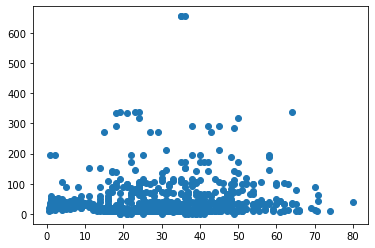

In [235]:
plt.scatter(allclass['Age'], y=allclass['Fare in USD'])

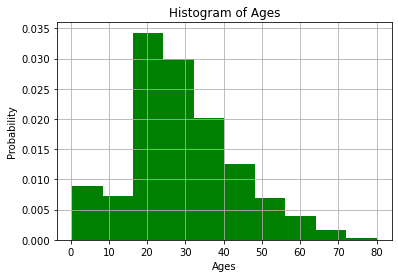

In [246]:
plt.hist(ages, density=True, facecolor='g')

plt.xlabel('Ages')
plt.ylabel('Probability')
plt.title('Histogram of Ages')
plt.grid(True)
plt.show()